<a href="https://colab.research.google.com/github/Singati2/AI_Science_Medicine/blob/main/Copy_of_Hahn_AI_2023_Autoencoder_and_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
!pip install wandb
import wandb as wb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=cc51fc32dedeb65426bf5e5925f49db59f4de4452df0195e49362b23dce93562
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y


## MNIST
    

### Load Data

In [ ]:
# #MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set  = MNIST('./data', train=False, download=True)

#KMNIST
train_set = KMNIST('./data', train=True, download=True)
test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

100%|██████████| 18165135/18165135 [00:15<00:00, 1201389.11it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 204822.23it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:03<00:00, 851494.33it/s]


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 7941877.40it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

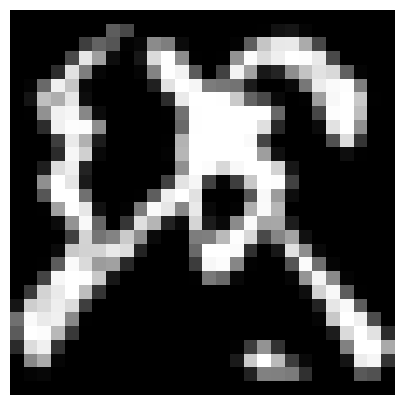

In [ ]:
plot(X[101,0,:,:])

In [ ]:
Y[100]

0

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

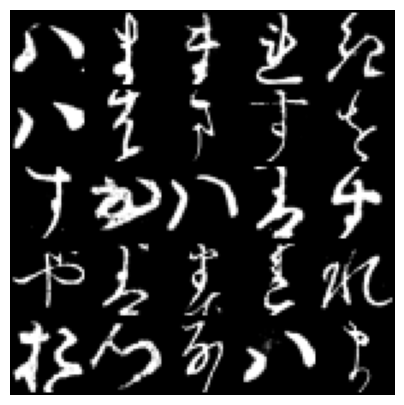

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)


### Classifier


In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1000, 784])

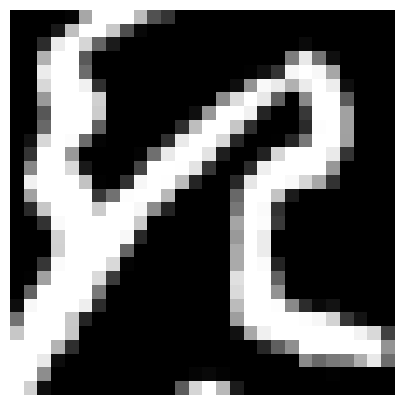

In [ ]:
plot(x[0].reshape(28,28))

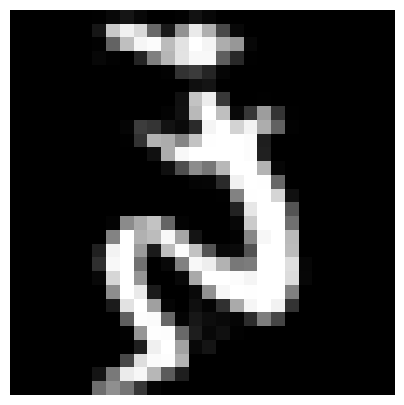

In [ ]:
plot(x[1].reshape(28,28))

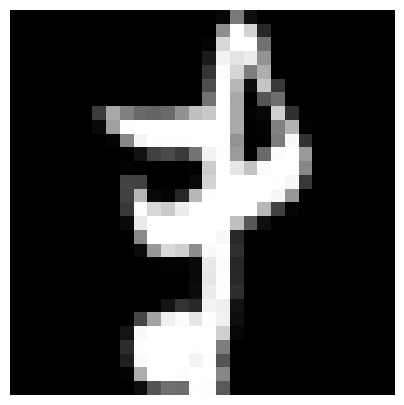

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y[:10]

tensor([1., 1., 6., 8., 4., 5., 1., 6., 0., 0.], device='cuda:0')

In [ ]:
W = GPU(np.random.randn(784,10))

In [ ]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

23.7 µs ± 2.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
x@W

tensor([[ 19.3087, -10.2389,  10.7452,  ...,  20.9500, -10.2204,   6.0315],
        [  1.9703, -17.1876,   2.6203,  ...,  13.3649,  12.8646,  -3.0970],
        [ 18.5307,  -7.9203,   5.1967,  ...,  24.8989,  -3.1549,  -3.6090],
        ...,
        [  3.6105,  -5.0626,  11.5681,  ...,  13.6835,   4.5781,  26.3060],
        [ 22.5546, -10.1450,  -1.8943,  ...,  18.9568,  -1.0738,   8.7917],
        [ 24.0626,  -5.6338,  -0.0808,  ...,   5.5317,  -6.2633,   6.1515]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W 

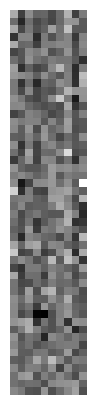

In [ ]:
plot(y2[:50])

In [ ]:
y

tensor([1., 1., 6., 8., 4., 5., 1., 6., 0., 0., 4., 4., 6., 5., 6., 7., 3., 1.,
        7., 0., 2., 2., 0., 1., 7., 2., 1., 7., 4., 0., 1., 6., 8., 5., 6., 1.,
        2., 6., 8., 9., 4., 7., 6., 1., 2., 3., 6., 2., 2., 3., 1., 8., 9., 5.,
        2., 6., 0., 6., 5., 1., 5., 3., 8., 3., 7., 5., 4., 0., 5., 6., 0., 4.,
        3., 9., 8., 2., 6., 2., 0., 8., 4., 2., 1., 4., 9., 8., 3., 9., 9., 1.,
        5., 6., 0., 2., 1., 7., 4., 2., 5., 1., 7., 3., 1., 7., 0., 5., 0., 8.,
        6., 9., 1., 1., 9., 1., 7., 4., 0., 2., 3., 5., 2., 9., 5., 7., 2., 8.,
        0., 5., 3., 9., 3., 1., 9., 7., 9., 8., 3., 9., 7., 7., 9., 6., 2., 4.,
        1., 5., 3., 3., 8., 5., 1., 0., 8., 0., 2., 2., 2., 0., 1., 3., 7., 0.,
        5., 2., 4., 3., 9., 5., 5., 2., 5., 0., 4., 8., 1., 2., 2., 1., 0., 1.,
        2., 5., 3., 7., 1., 5., 7., 1., 5., 5., 1., 0., 4., 9., 9., 9., 8., 3.,
        5., 0., 8., 2., 1., 8., 4., 3., 4., 1., 0., 0., 5., 8., 5., 9., 8., 0.,
        2., 3., 6., 9., 3., 8., 6., 3., 

In [ ]:
y.shape

torch.Size([1000])

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
one_hot(y)

<ipython-input-17-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]], device='cuda:0')

In [ ]:
torch.argmax(y2,1)

tensor([7, 7, 7, 2, 0, 7, 2, 6, 9, 9, 7, 6, 7, 7, 7, 7, 4, 0, 7, 2, 5, 5, 9, 0,
        9, 6, 7, 7, 2, 9, 3, 0, 7, 9, 0, 9, 5, 7, 4, 7, 2, 2, 0, 0, 7, 5, 5, 2,
        8, 8, 7, 0, 0, 5, 2, 2, 7, 7, 9, 3, 4, 9, 0, 7, 7, 4, 7, 7, 7, 7, 7, 7,
        9, 6, 4, 7, 5, 7, 5, 0, 7, 0, 7, 2, 7, 0, 6, 7, 0, 6, 9, 0, 9, 1, 0, 5,
        6, 9, 4, 0, 9, 7, 7, 7, 5, 9, 9, 2, 2, 0, 7, 0, 7, 7, 5, 9, 9, 0, 6, 3,
        0, 9, 3, 9, 0, 0, 7, 2, 5, 9, 7, 0, 7, 9, 0, 0, 9, 0, 7, 6, 7, 5, 9, 7,
        0, 7, 9, 9, 2, 7, 2, 9, 9, 9, 9, 0, 5, 7, 7, 9, 2, 9, 4, 5, 1, 6, 7, 9,
        4, 5, 4, 9, 6, 7, 7, 0, 0, 0, 3, 9, 0, 0, 9, 9, 6, 9, 9, 9, 7, 5, 0, 9,
        2, 9, 8, 2, 2, 9, 4, 6, 0, 0, 6, 1, 6, 6, 7, 0, 7, 9, 5, 0, 5, 7, 2, 9,
        0, 9, 7, 0, 6, 4, 6, 9, 2, 0, 7, 9, 1, 0, 7, 6, 4, 0, 0, 0, 2, 0, 0, 7,
        5, 6, 5, 9, 9, 9, 0, 0, 2, 9, 7, 7, 0, 2, 4, 5, 6, 7, 9, 0, 0, 7, 6, 9,
        7, 7, 7, 2, 0, 7, 6, 6, 5, 9, 7, 9, 6, 7, 2, 9, 7, 7, 0, 7, 4, 7, 7, 0,
        0, 9, 7, 9, 7, 5, 0, 9, 4, 9, 0,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0710, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[  2.2628,   7.5779,   3.1874,  ...,   5.3170, -11.8491,  12.9605],
        [ -1.5556,   1.8571,  -3.4751,  ...,  23.9507,  -4.8027,   6.8708],
        [-14.6655, -19.0874,  -0.4142,  ...,  11.3948,  10.4520,   6.8689],
        ...,
        [ -2.6191,  -9.4008,  -5.6640,  ...,   5.4601, -21.7864,   5.4009],
        [ 11.1991,  10.1981,  -9.2492,  ...,  10.4567, -18.2991,  13.6319],
        [  3.0678,   6.2002, -12.9509,  ...,   3.1233,  -5.7837, -13.9935]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1)

tensor([4, 7, 7,  ..., 3, 9, 4], device='cuda:0')

In [ ]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0927, device='cuda:0')

In [ ]:
X@W

tensor([[  2.2628,   7.5779,   3.1874,  ...,   5.3170, -11.8491,  12.9605],
        [ -1.5556,   1.8571,  -3.4751,  ...,  23.9507,  -4.8027,   6.8708],
        [-14.6655, -19.0874,  -0.4142,  ...,  11.3948,  10.4520,   6.8689],
        ...,
        [ -2.6191,  -9.4008,  -5.6640,  ...,   5.4601, -21.7864,   5.4009],
        [ 11.1991,  10.1981,  -9.2492,  ...,  10.4567, -18.2991,  13.6319],
        [  3.0678,   6.2002, -12.9509,  ...,   3.1233,  -5.7837, -13.9935]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

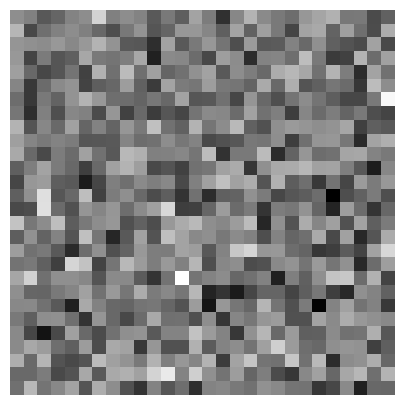

In [ ]:
plot(W[:,0].reshape(28,28))

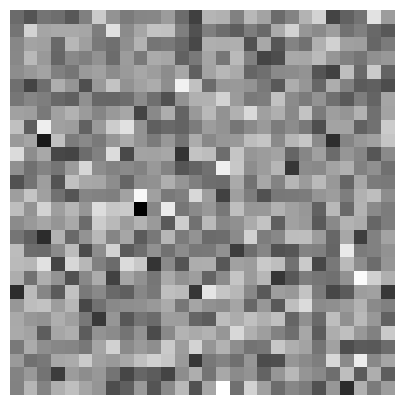

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

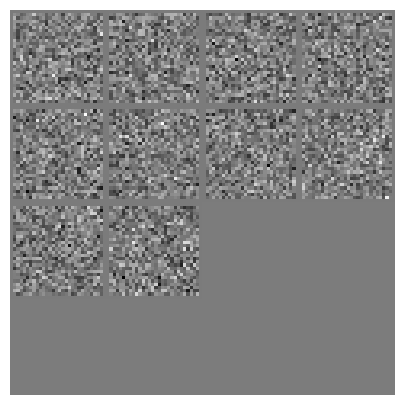

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def acc(out,y):
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def gradient_step(w):

    w[0].data = w[0].data - c.L*w[0].grad.data
    
    w[0].grad.data.zero_()

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-17-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


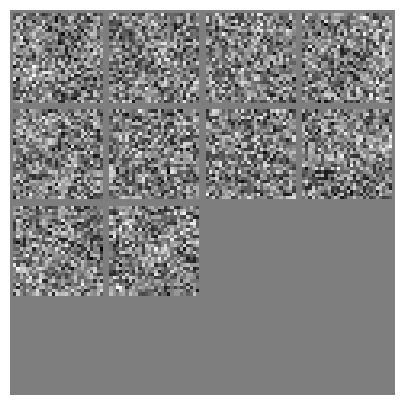

acc_test,▁▁▁▁▂▂▂▃▄▄▄▄▅▅▅▅▅▆▆▆▇▆▆▆▆▇▇▆▇▇▇▇██▇█████
acc_train,▁▁▁▂▂▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇▆▆▇▇▇▇▇▇▇▇█▇██▇█
acc_test,0.39648
acc_train,0.55176


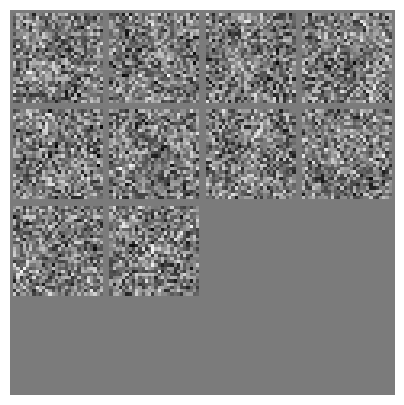

acc_test,▁▁▁▂▂▂▃▄▄▅▅▅▅▆▆▆▇▆▇▇▇▇▇▇▇▇▇███▇██▇██████
acc_train,▁▁▂▂▂▃▃▄▄▄▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇███▇██████████
acc_test,0.50391
acc_train,0.65332


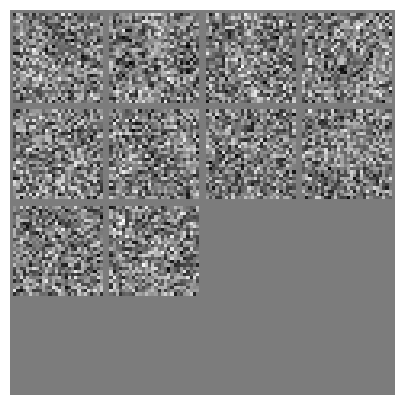

acc_test,▁▁▁▂▃▃▃▃▃▄▄▅▅▅▅▆▅▆▆▆▇▆▆▇▇▇▆▆▆▇▆▇▇▇▇▇▇▇▇█
acc_train,▁▁▁▂▃▃▃▃▄▅▄▅▅▅▅▆▆▅▆▇▆▆▇▇▆▇▆▇▇▇▇▇▇▇▇▇▇███
acc_test,0.44238
acc_train,0.55566


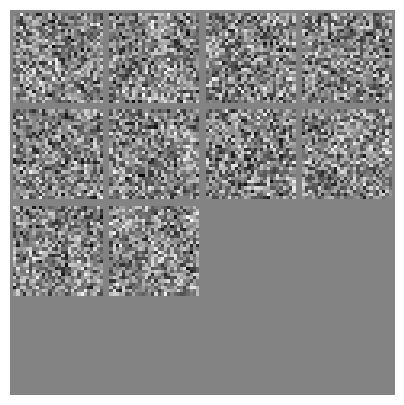

acc_test,▁▁▂▁▃▃▃▃▄▄▄▄▅▅▄▅▅▆▆▆▅▅▅▆▆▅▆▇▇█▇▇█▇███▇▇▇
acc_train,▁▁▁▂▂▃▃▄▃▄▄▄▄▅▆▅▆▆▅▇▆▆▇▇▇▆▇▇▇▇▇▇▇▇██▇██▇
acc_test,0.33105
acc_train,0.40918


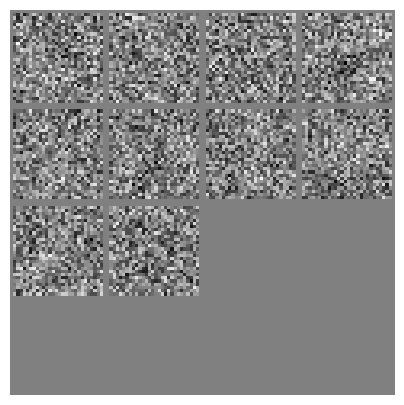

acc_test,▁▁▂▂▃▃▃▄▃▄▄▄▅▄▅▄▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇████
acc_train,▁▂▂▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▅▆▆▆▇▇▇▇▇▇▇▇████▇██
acc_test,0.40137
acc_train,0.53516


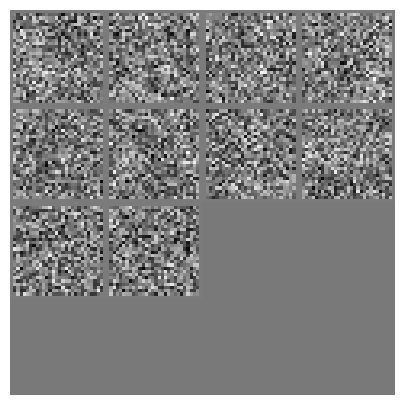

acc_test,▁▁▃▃▄▄▄▄▅▅▅▆▅▆▆▆▇▆▆▇▆▇▆▆▆▇▇▆▇▇█▇▇█▇▇████
acc_train,▁▁▃▃▃▄▄▅▅▅▆▆▆▆▆▇▇▇▆▇▇▇▇▇▇▇█▇███▇█▇██████
acc_test,0.375
acc_train,0.50586


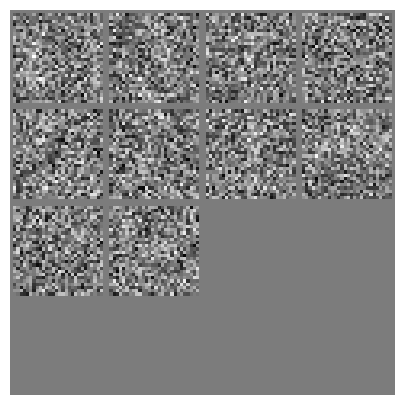

acc_test,▁▁▁▂▂▃▃▄▄▄▅▅▆▆▅▆▆▆▆▆▆▇▆▆▇▆▆▆▆▆▇▇▆▇▇▇▇█▇▇
acc_train,▁▁▁▂▂▃▄▄▅▅▅▅▅▆▆▆▆▆▇▆▇▇▇▇▆▆▇▇▇▇▇▇▇███████
acc_test,0.41602
acc_train,0.4502


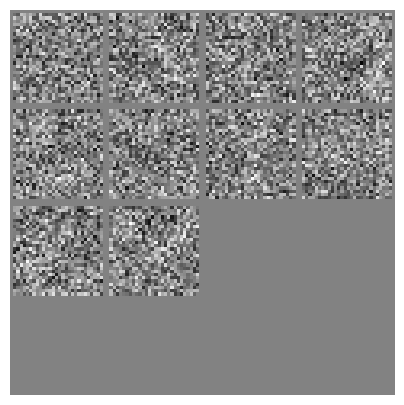

acc_test,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█▇██████▇███
acc_train,▁▂▂▃▃▄▅▅▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██▇▇█████
acc_test,0.40234
acc_train,0.54492


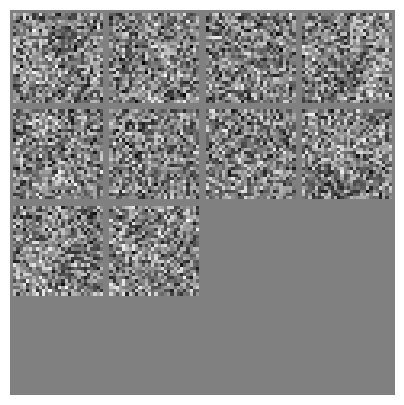

acc_test,▁▂▂▃▄▅▄▅▅▅▆▅▅▆▆▅▆▆▆▅▇▇▇▇▇▆▇▇▇▆▇▇▇▇▇▇▇█▇▇
acc_train,▁▁▃▄▄▄▄▅▅▅▆▅▆▆▇▇▇▆▆▆▇▆▇▇█▇▇█▇▇▇▇██▇▇▇███
acc_test,0.40625
acc_train,0.46973


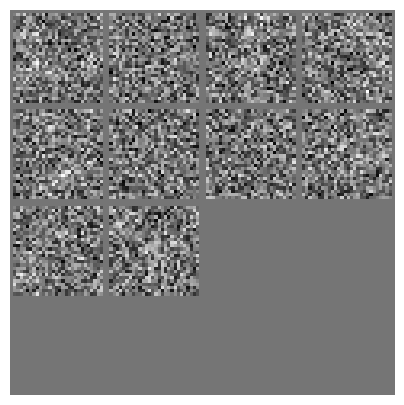

acc_test,▁▂▂▂▃▃▃▃▃▄▄▅▅▅▆▅▆▆▆▆▇▇▇▇▇▇▆▇▆█▇▇▇▇▇█▇▇█▇
acc_train,▁▁▂▃▂▃▃▃▃▄▄▅▅▅▅▆▆▅▆▆▆▇▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██
acc_test,0.375
acc_train,0.44434


KeyboardInterrupt: ignored

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_SGD_23");
    c = wb.config

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))]

    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)

        loss = cross_entropy(softmax(out),y)

        loss.backward()

        gradient_step(w)

        make_plots()
    
        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

acc_test,▁▁▁▂▂▂▂▃▃▄▄▃▄▄▄▄▄▅▅▄▅▆▅▅▆▅▆▆▇▅█▇▆▇▆█▇▇▇█
acc_train,▁▂▂▂▂▂▃▃▃▃▃▅▄▅▅▄▅▄▅▅▆▅▄▆▅▆▆▇▆▆▇▇▇▇▇▇▇██▇
acc_test,0.28125
acc_train,0.35352


<ipython-input-17-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


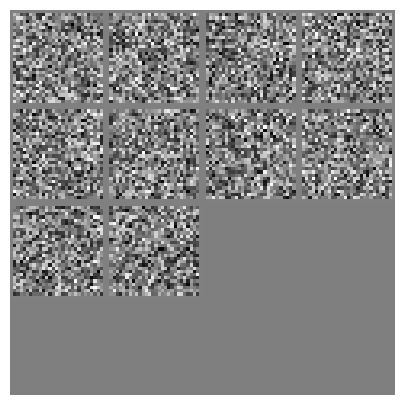

KeyboardInterrupt: ignored

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)  

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        wb.log({"loss": loss})

        make_plots()

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())


### Autoencoder


In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-4y6rlga8
  Running command git clone --filter=blob:none --quiet https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-4y6rlga8
  Resolved https://github.com/williamedwardhahn/mpcr to commit 8d265643f3b8b6e0ed96c7fb98da047fdcd3bb51
  Preparing metadata (setup.py) ... done
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7664 sha256=d7c01b944cb6901ebd68d3147666e69e280e4a6e7edcab8e48b0d55eacb95ea9
  Stored in directory: /tmp/pip-ephem-wheel-cache-f33j4t67/wheels/ea/02/e0/f5ddcc5cf9849058373052ecb328f3e9843fac4141b8491e0f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def get_batch(mode):
    b = 1024
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)

In [ ]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x

In [ ]:
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

optimizer = torch.optim.Adam(params=w, lr=learning_rate)

for i in range(num_steps):

    x_real,y = get_batch('train')
    
    x_fake = Autoencoder(x_real,w)
    
    loss = torch.mean((x_fake - x_real)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if i % 100 == 0: print(loss.item())

1.47315514087677
0.3098812997341156
0.25660163164138794
0.24139609932899475
0.2292076051235199
0.21920530498027802
0.20734840631484985
0.20882752537727356
0.20590579509735107
0.19707000255584717


In [ ]:
image_batch,y = get_batch('test')

In [ ]:
image_batch_recon = Autoencoder(image_batch,w)

In [ ]:
torch.mean((image_batch_recon - image_batch)**2)

tensor(0.2208, device='cuda:0', grad_fn=<MeanBackward0>)

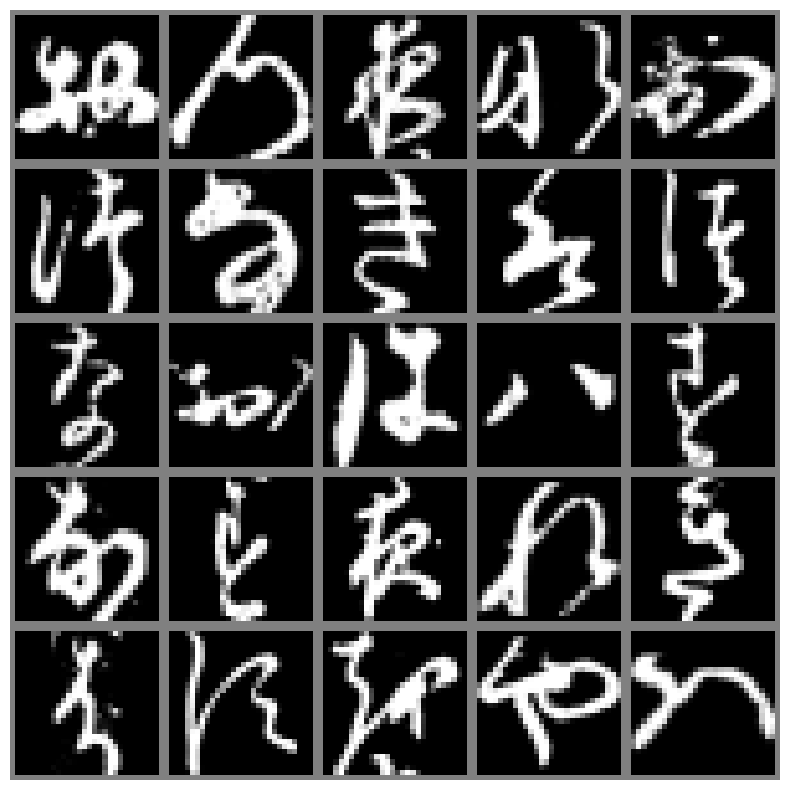

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

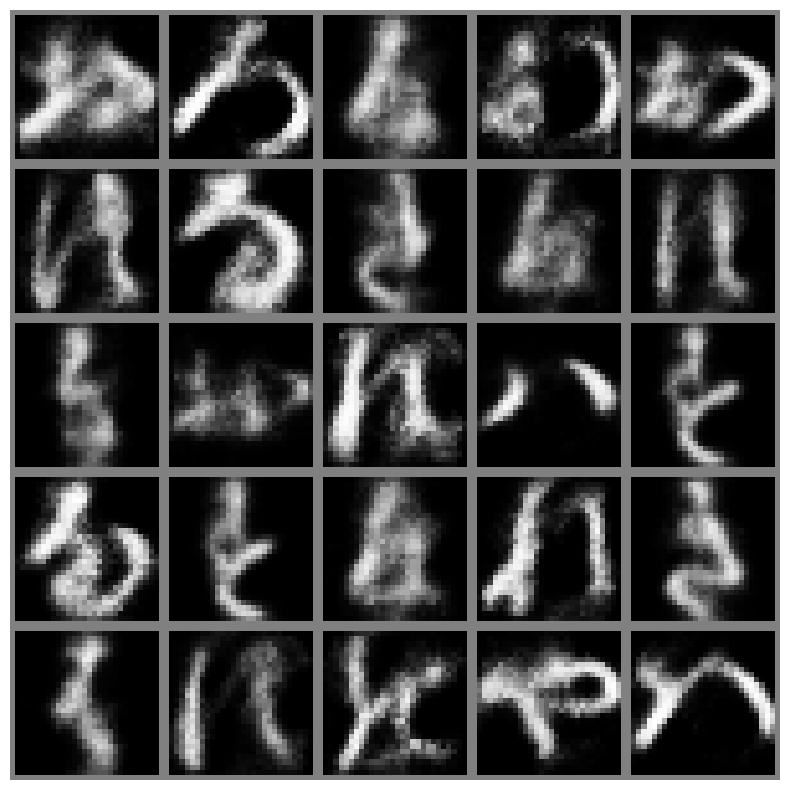

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



Convolutional Transpose

In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 32

In [ ]:
#MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 16039126.32it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 269059.65it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5104342.77it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3839309.56it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
x,y = get_batch('train')

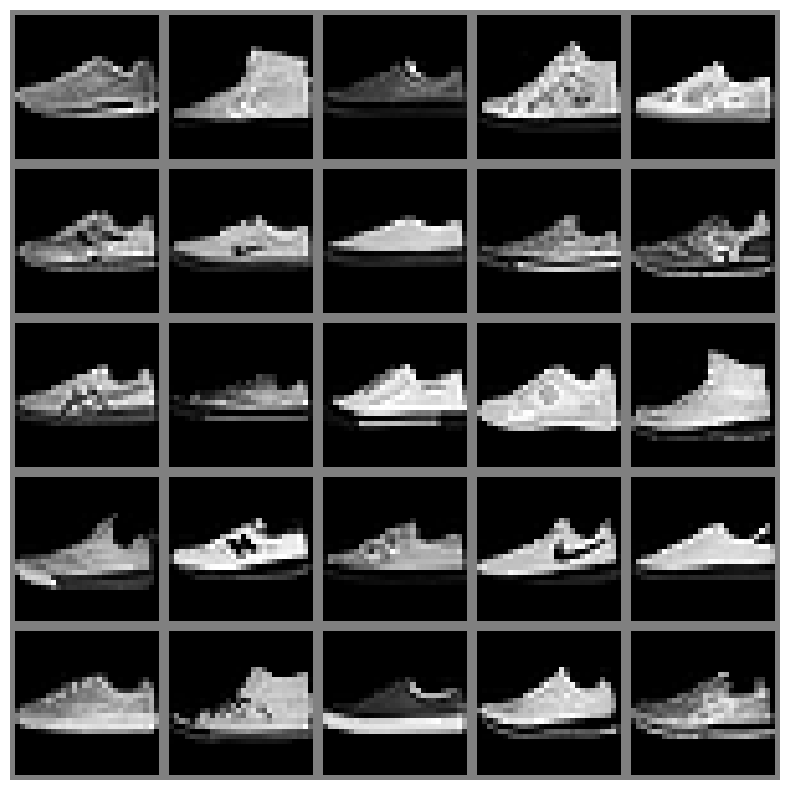

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = Variable(torch.ones(batch_size, 1).cuda())
fake_labels = Variable(torch.zeros(batch_size, 1).cuda())

In [ ]:
num_epochs = 500 
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = Variable(torch.randn(steps,batch_size,latent_size).cuda())
z2 = Variable(torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
for i in range(steps):
        
    images,y = get_batch('train')
        
    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()
       
    
    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

    
    if i % 2000 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])

ValueError: ignored